In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
#we load datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

The main problem with this dataset is the .json format. Checking the dataset, we can see that: genres, keywords, production_companies, production_countries, spoken_languages are in the json format. Similarly in the 'credits' csv file, cast and crew are in the json format. 

Now lets convert these columns into a format that can be easily read and interpreted. We will convert them into strings and later convert them into lists for easier interpretation.

**Converting the json into strings**

In [4]:
#changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
#changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
        movies.loc[index,'production_companies']=str(list1)
    
#changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)
    
#changing the cast column from json to string
credits['cast']=credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast']=str(list1)

#changing the crew column from json to string    
credits['crew']=credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew']=credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [5]:
credits.rename(columns={'movie_id':'id'}, inplace = True)

In [6]:
#merging datasets
movies = pd.merge(movies,
                 credits[['id', 'cast', 'director']],
                 on='id')

In [7]:
#we add a profit column
movies['profit'] = movies['revenue'] - movies['budget']
movies['profit_rate'] = movies['profit'] / movies['budget']

In [8]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
director                 object
profit                    int64
profit_rate             float64
dtype: object

In [9]:
movies.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count        profit  profit_rate  
count   4803.000000   4803.000000  4.803000e+03  3913.000000  
mean       6.092172    690.217989  5.321560e+07          inf  
std        1.194612   1234.585891  1.359677e+08          NaN  
min        0.000000      0.000000 -1.657101e+08    -1.000000  
25%        5.600000     54.000000 -7.995375e+05    -0.454545  
50%        6.200000    235.000000  2.511317e+06     0.999014  
75%        6.800000    737.000000  5.531286e+07     3.326712  
max       10.000000  13752.000000  2.550965e+09          inf

In [10]:
movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  ['culture clash', 'future', 'space war', 'spac...                en   
1  ['ocean', 'drug abuse', 'exotic island', 'east...                en   
2  ['spy', 'based on novel', 'secret agent', 'seq...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ...  \
0  ['Ingenious Film Partners', 'Twentieth Century...  ...   
1  ['Walt Disney Pictures', 'Jerry Bruckheimer Fi...  ...   
2             ['Columbia Pictures', 'Danjaq', 'B24']  ...   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                                cast        director  \
0  ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...   James Cameron   
1  ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...  Gore Verbinski   
2  ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...      Sam Mendes   

       profit  profit_rate  
0  2550965087    10.763566  
1   661000000     2.203333  
2   635674609     2.594590  

[3 rows x 24 columns]

In [11]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
director                  30
profit                     0
profit_rate              890
dtype: int64

# **VISUALIZATION AND INSIGHTS**

**REVENUE, BUDGET, VOTE_COUNT**


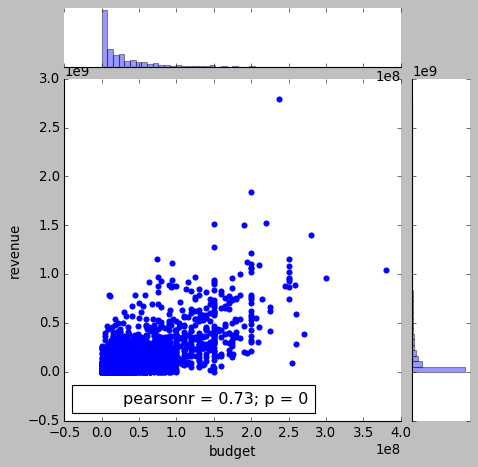

In [12]:
from scipy.stats import pearsonr

sns.jointplot(x='budget', y='revenue', stat_func =pearsonr,data=movies)

We can definitely see some corelation between budget and revenue.

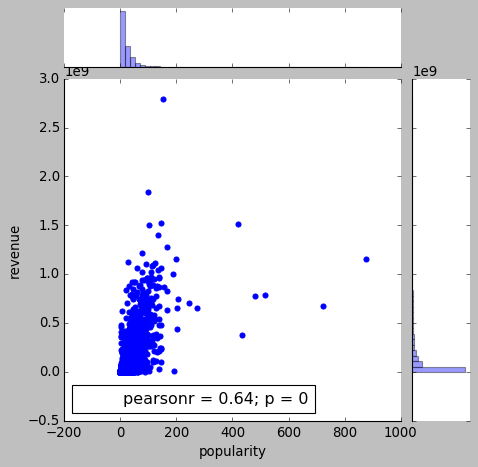

In [13]:
sns.jointplot(x='popularity', y='revenue', stat_func =pearsonr,data=movies)

and, again as expected , we see corelation between revenue and popularity.

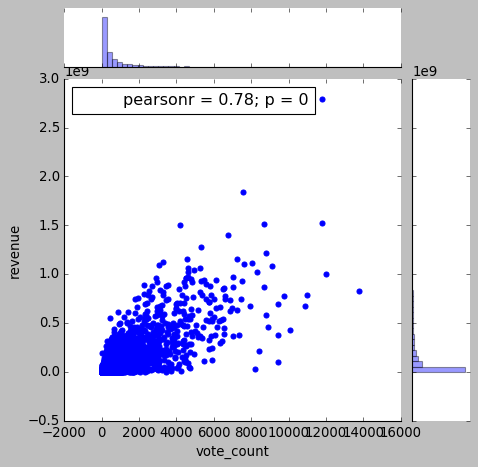

In [14]:
sns.jointplot(x='vote_count', y='revenue', stat_func =pearsonr,data=movies)

Here, there's a strong corelation between revenue and vote_count. This is obviously because movies that have good returns are necessary to have a good critical score.

In [15]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [16]:
#closer look of revenue, budget by vote_count
movies[['title', 'vote_count','budget', 'revenue', 'year']].sort_values('vote_count', ascending=False).head(10)

title  vote_count     budget     revenue  year
96                 Inception       13752  160000000   825532764  2010
65           The Dark Knight       12002  185000000  1004558444  2008
0                     Avatar       11800  237000000  2787965087  2009
16              The Avengers       11776  220000000  1519557910  2012
788                 Deadpool       10995   58000000   783112979  2016
95              Interstellar       10867  165000000   675120017  2014
287         Django Unchained       10099  100000000   425368238  2012
94   Guardians of the Galaxy        9742  170000000   773328629  2014
426         The Hunger Games        9455   75000000   691210692  2012
127       Mad Max: Fury Road        9427  150000000   378858340  2015

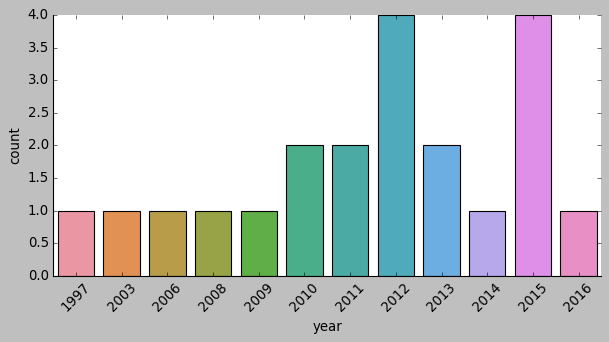

In [17]:
most_popular_movies = movies[['title', 'vote_count', 'year','revenue']].sort_values('vote_count', ascending=False)

most_popular_movies = most_popular_movies[most_popular_movies['revenue']>=1000000000]

chart = sns.catplot(x="year", data=most_popular_movies, kind="count")
chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(8, 4)

From the dataset, after 1997 (titanic) which was the first movie to cross 1 billion dollar mark, 2012 and 2015 had many movies crossing the billion dollar mark.

**GENRES**

In [18]:
import ast
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [19]:
m = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
m.name = 'genre'

In [20]:
gen_df = movies.drop('genres', axis=1).join(m)

In [21]:
gen_pop = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
gen_pop.columns = ['genre', 'movies']
gen_pop.head(10)

genre  movies
0            Drama    2297
1           Comedy    1722
2         Thriller    1274
3           Action    1154
4          Romance     894
5        Adventure     790
6            Crime     696
7  Science Fiction     535
8           Horror     519
9           Family     513

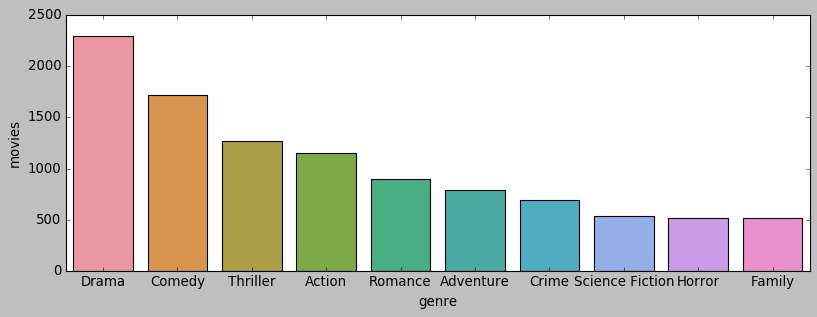

In [22]:
plt.figure(figsize=(12,4))
sns.barplot(x='genre', y='movies', data=gen_pop.head(10))
plt.show()

**Most popular Genre**

In [23]:
res = movies.set_index(['popularity', 'budget','profit' ,'revenue'])['genres'].apply(pd.Series).stack()
res = res.reset_index()
res.columns = ['popularity','revenue', 'budget','profit', 'sample_num','genre']
res.drop('sample_num',axis=1,inplace=True)
res

popularity    revenue      budget      profit            genre
0      150.437577  237000000  2550965087  2787965087           Action
1      150.437577  237000000  2550965087  2787965087        Adventure
2      150.437577  237000000  2550965087  2787965087          Fantasy
3      150.437577  237000000  2550965087  2787965087  Science Fiction
4      139.082615  300000000   661000000   961000000        Adventure
...           ...        ...         ...         ...              ...
12155    1.444476          0           0           0           Comedy
12156    1.444476          0           0           0            Drama
12157    1.444476          0           0           0          Romance
12158    1.444476          0           0           0         TV Movie
12159    1.929883          0           0           0      Documentary

[12160 rows x 5 columns]

Action, Adventure, Fantasy, Science Fiction are the most popular genres followed by Adventure

**Movies with the biggest budget**

In [24]:
B_budget = movies[movies['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

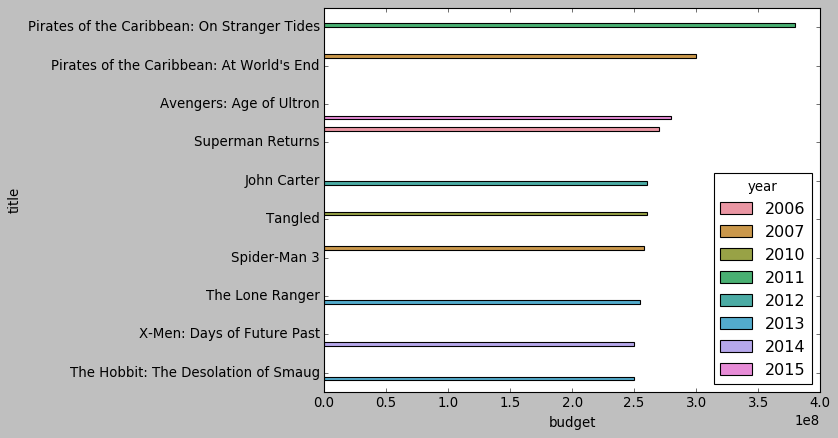

In [25]:
sns.barplot(x = 'budget',
            y = 'title',
            hue = 'year',
            data = B_budget)
plt.show()

Who doesn't like Johny Depp? Pirates of the Caribbean is the most expensive movie ever made!

**Highest Grossing movies**

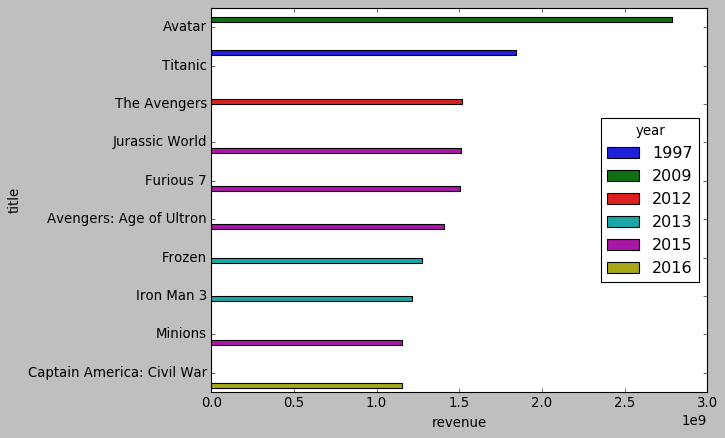

In [26]:
gross_top = movies[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)

sns.barplot(x = 'revenue',
            y = 'title',
            hue = 'year',
            data = gross_top)
plt.show()

This makes the mighty avatar, the highest grossing movie of all time which surprisingly surpassed the **The Avengers**.

**Yearly Revenue**

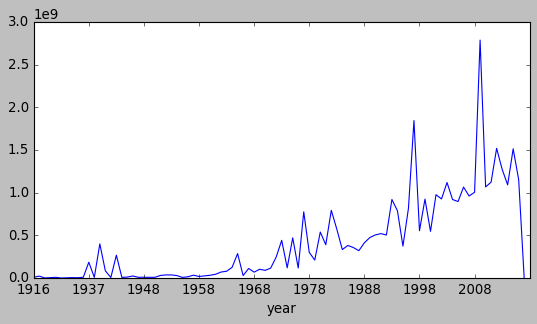

In [27]:
plt.figure(figsize=(8,4))
year_revenue = movies[(movies['revenue'].notnull()) & (movies['year'] != 'NaT')].groupby('year')['revenue'].max()

year_revenue.plot(kind='line')

We can see that the revenue has been steadily increasing over the years.

**Movie Genre and Revenue**

In [28]:
import plotly.express as px
df = px.data.tips()
fig = px.box(res, x="genre", y="revenue")
fig.show()

**Movie Genre and Budget**

In [29]:
import plotly.express as px
df = px.data.tips()
fig = px.box(res, x="genre", y="budget")
fig.show()

**Movie Genre and Profit**

In [30]:
import plotly.express as px
df = px.data.tips()
fig = px.box(res, x="genre", y="profit")
fig.show()

Let's see the relationship between budget and revenue

In [31]:
fig = px.scatter(res, x="budget", y="revenue", trendline="ols", title="Relationship between Budget and Revenue")
fig.update_layout(xaxis_title="Budget", 
                 yaxis_title="Revenue")
fig.show()

As budget increases, mostly revenue increases.

**CAST AND DIRECTORS**

In [32]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director']=movies['director'].apply(xstr)

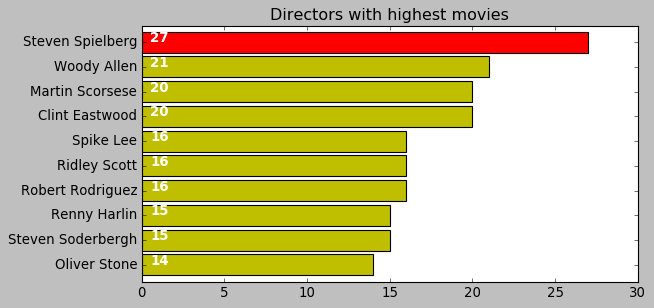

In [33]:
plt.subplots(figsize=(8,4))
ax=movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.85,color='y')
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Directors with highest movies')
plt.show()